In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
##查看关于corrected中的数据
data = pd.read_csv('./dataset/kddcup.data_10_percent_corrected', header=None)

features_single_tcp_connetct_columns=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes","land", "wrong_fragment", "urgent"]#单一TCP连接特征
features_Content_features_columns = ["hot", "num_failed_logins", "logged_in","num_compromised", "root_shell", "su_attempted", "num_root",  #登录特征
    "num_file_creations","num_shells", "num_access_files", "num_outbound_cmds", "is_host_login","is_guest_login"]
features_Traffic_within_twoscconds_columns =["count", "srv_count", "serror_rate", "srv_serror_rate","rerror_rate", 
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate","srv_diff_host_rate"]
features_DST_Traffic_within_twoscconds_columns = [  "dst_host_count", "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate", "dst_host_srv_serror_rate","dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
label = ["label"]
columns = features_single_tcp_connetct_columns+features_Content_features_columns+features_Traffic_within_twoscconds_columns+features_DST_Traffic_within_twoscconds_columns+label
data.columns = columns

In [ ]:
single_connect_data = data[features_single_tcp_connetct_columns]
Content_data = data[features_Content_features_columns]
SrcTraffic_data = data[features_Traffic_within_twoscconds_columns]
DstTraffic_data= data[features_DST_Traffic_within_twoscconds_columns]

Generating category mapping for dataset: Single TCP Connect Features
Category mapping generated: {'protocol_type': {'tcp': 'tcp', 'udp': 'udp', 'icmp': 'icmp'}, 'land': {0: '0', 1: '1'}, 'wrong_fragment': {0: '0', 1: '1', 3: '3'}, 'urgent': {0: '0', 2: '2', 1: '1', 3: '3'}}


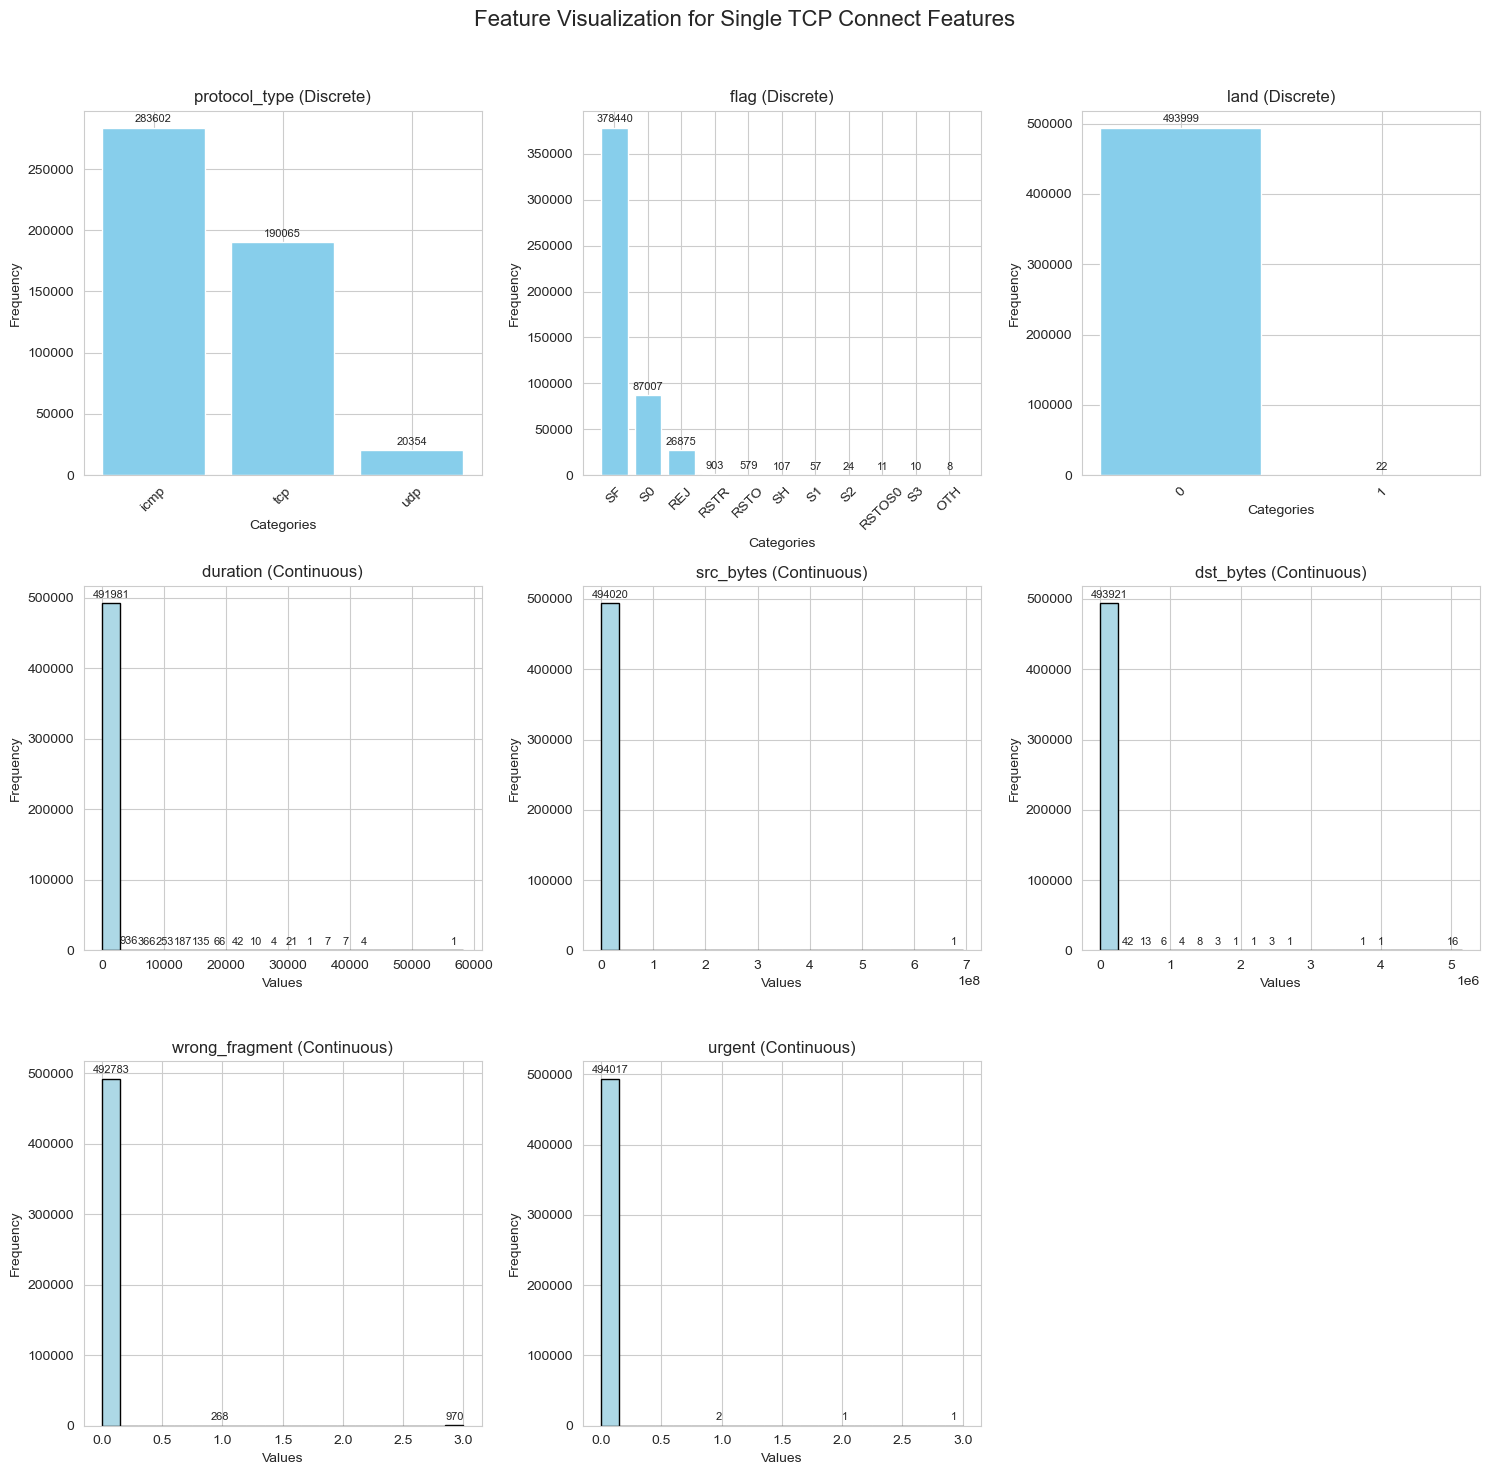

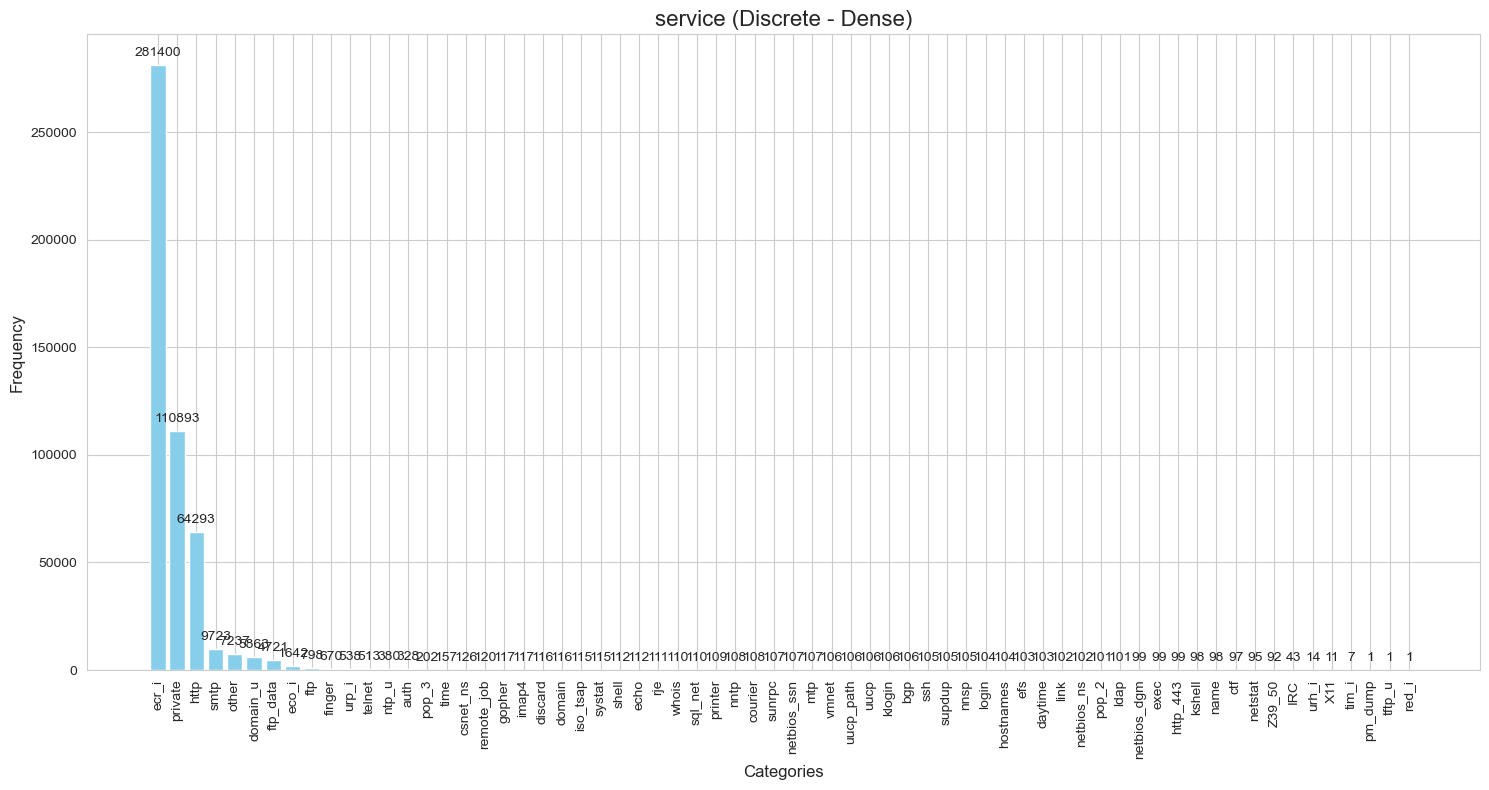

Generating category mapping for dataset: Content Features
Category mapping generated: {'num_failed_logins': {0: '0', 1: '1', 5: '5', 2: '2', 4: '4', 3: '3'}, 'logged_in': {1: '1', 0: '0'}, 'root_shell': {0: '0', 1: '1'}, 'su_attempted': {0: '0', 1: '1', 2: '2'}, 'num_shells': {0: '0', 2: '2', 1: '1'}, 'num_access_files': {0: '0', 1: '1', 2: '2', 4: '4', 6: '6', 3: '3', 8: '8'}, 'num_outbound_cmds': {0: '0'}, 'is_host_login': {0: '0'}, 'is_guest_login': {0: '0', 1: '1'}}


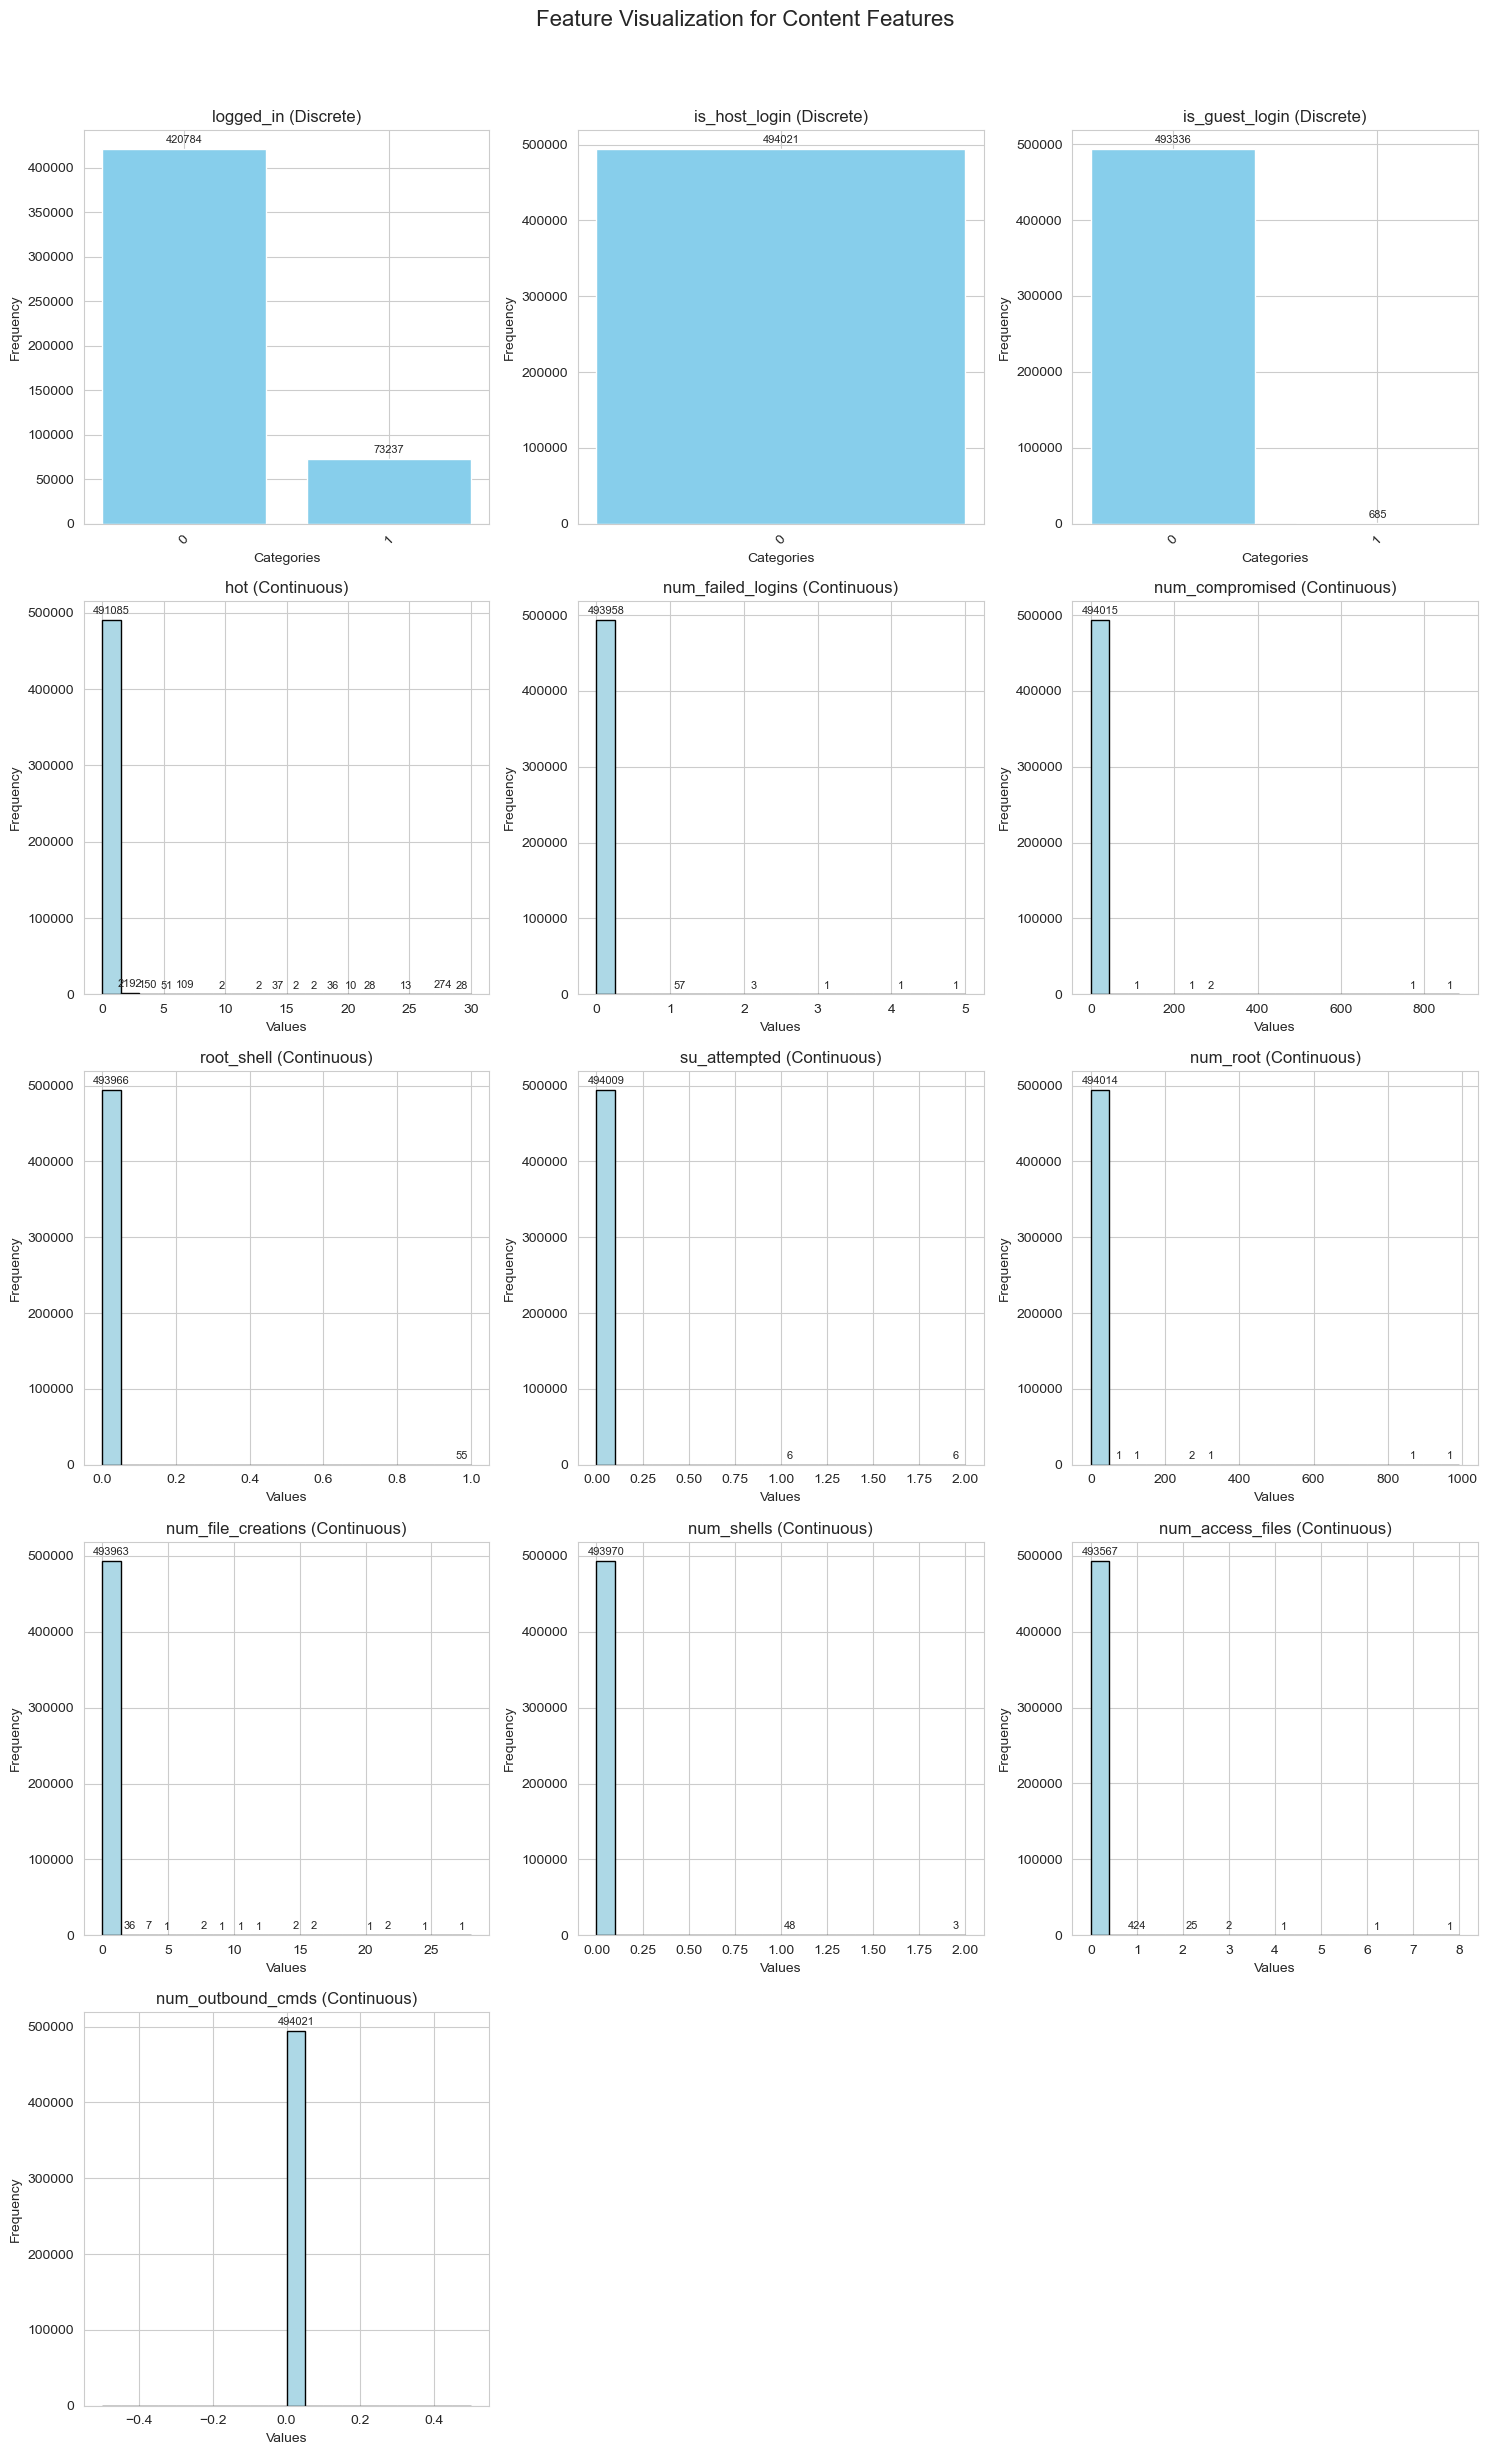

Generating category mapping for dataset: Source Traffic Features
Category mapping generated: {}


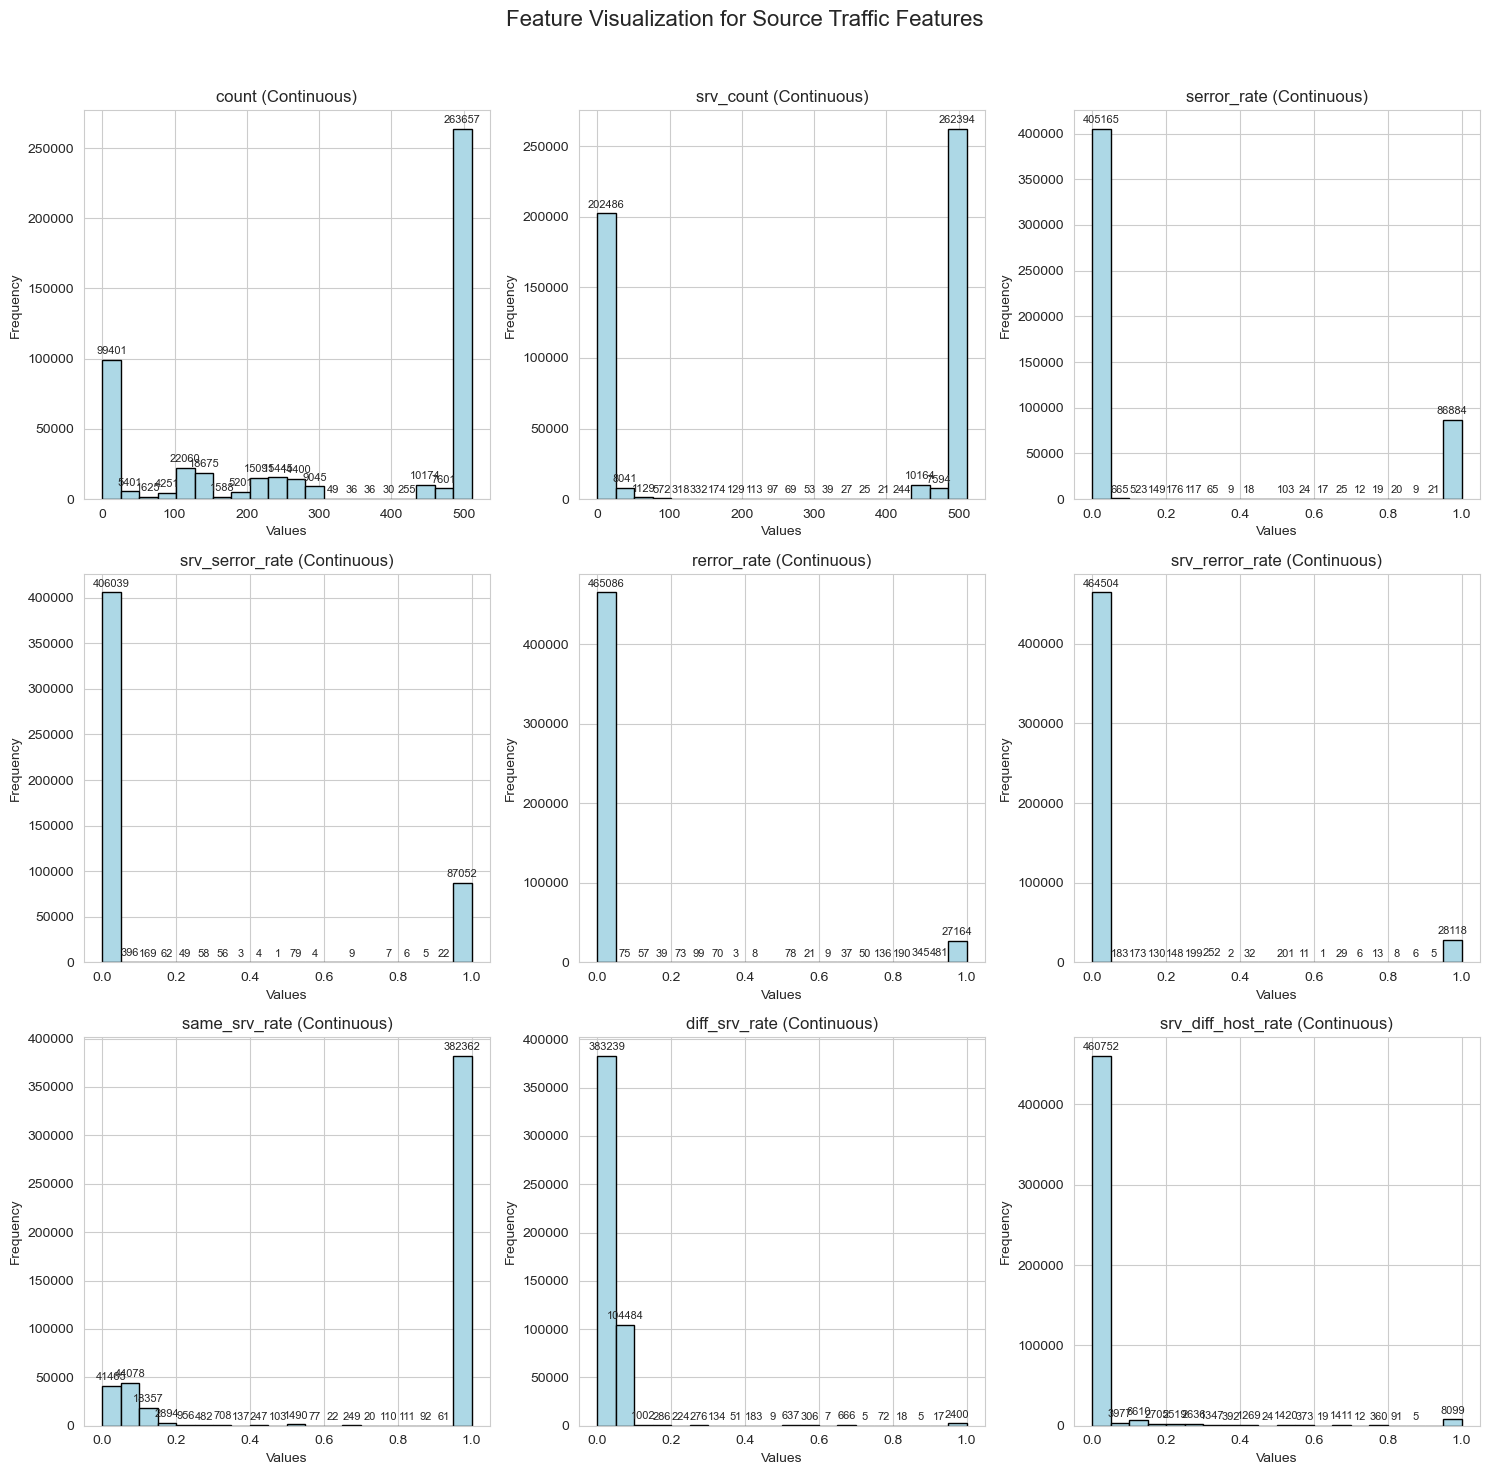

Generating category mapping for dataset: Destination Traffic Features
Category mapping generated: {}


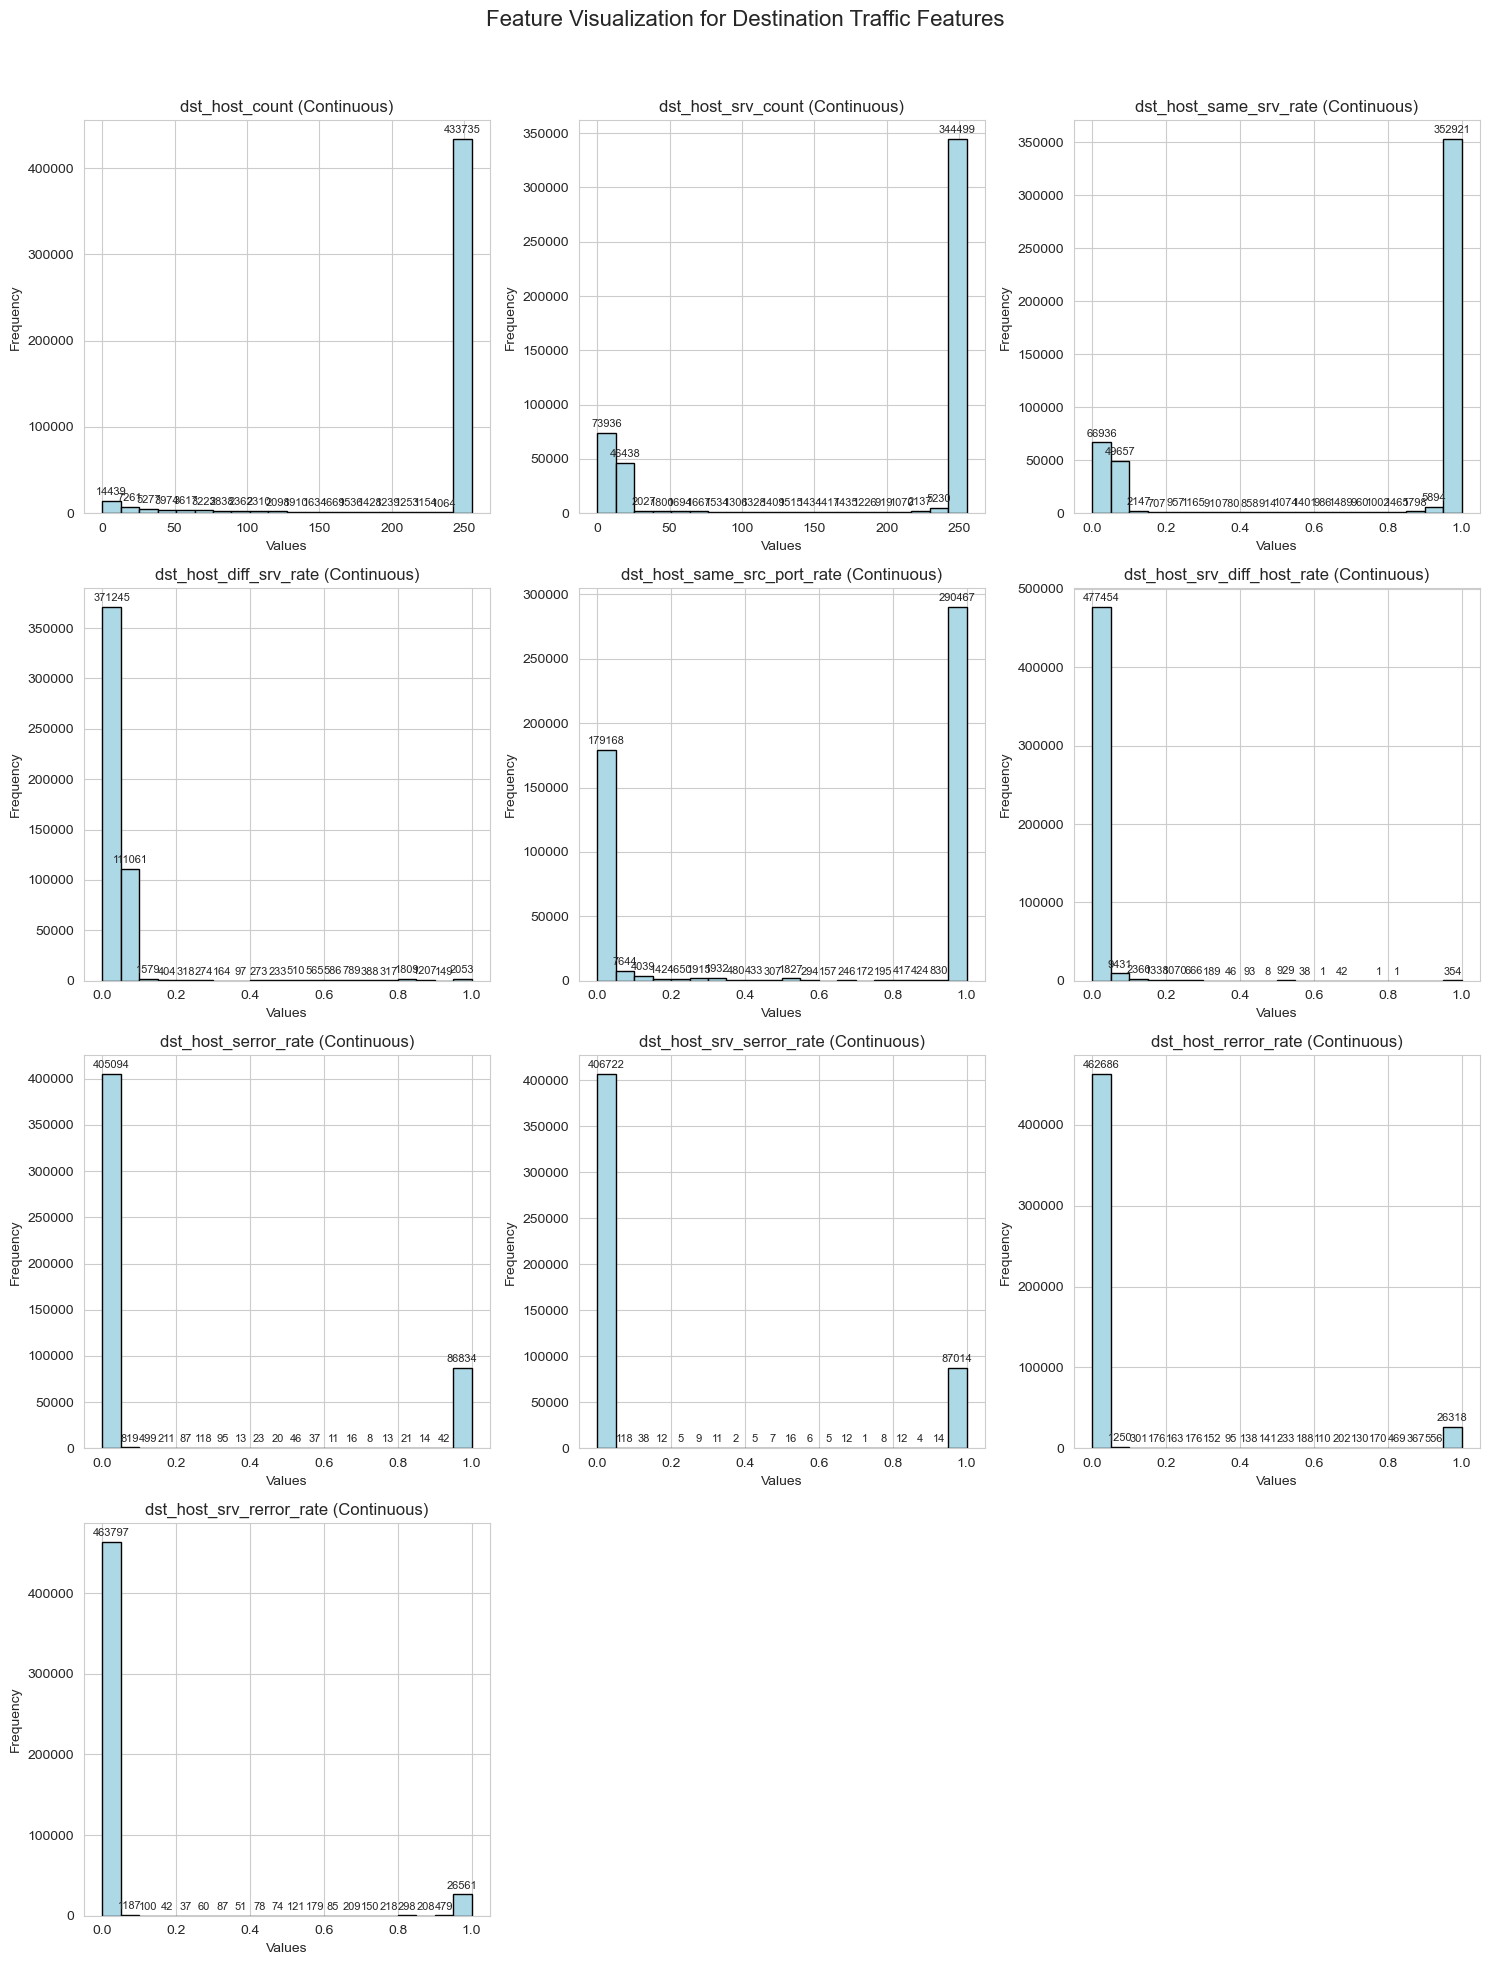

In [27]:
# 定义数据集
datasets = {
    "Single TCP Connect Features": single_connect_data,
    "Content Features": Content_data,
    "Source Traffic Features": SrcTraffic_data,
    "Destination Traffic Features": DstTraffic_data
}

# 特征类型映射
feature_types = {
    "duration": "continuous",
    "protocol_type": "symbolic",
    "service": "symbolic",
    "flag": "symbolic",
    "src_bytes": "continuous",
    "dst_bytes": "continuous",
    "land": "symbolic",
    "wrong_fragment": "continuous",
    "urgent": "continuous",
    "hot": "continuous",
    "num_failed_logins": "continuous",
    "logged_in": "symbolic",
    "num_compromised": "continuous",
    "root_shell": "continuous",
    "su_attempted": "continuous",
    "num_root": "continuous",
    "num_file_creations": "continuous",
    "num_shells": "continuous",
    "num_access_files": "continuous",
    "num_outbound_cmds": "continuous",
    "is_host_login": "symbolic",
    "is_guest_login": "symbolic",
    "count": "continuous",
    "srv_count": "continuous",
    "serror_rate": "continuous",
    "srv_serror_rate": "continuous",
    "rerror_rate": "continuous",
    "srv_rerror_rate": "continuous",
    "same_srv_rate": "continuous",
    "diff_srv_rate": "continuous",
    "srv_diff_host_rate": "continuous",
    "dst_host_count": "continuous",
    "dst_host_srv_count": "continuous",
    "dst_host_same_srv_rate": "continuous",
    "dst_host_diff_srv_rate": "continuous",
    "dst_host_same_src_port_rate": "continuous",
    "dst_host_srv_diff_host_rate": "continuous",
    "dst_host_serror_rate": "continuous",
    "dst_host_srv_serror_rate": "continuous",
    "dst_host_rerror_rate": "continuous",
    "dst_host_srv_rerror_rate": "continuous"
}

# 自动生成类别映射关系
def generate_category_mapping(data, threshold=10):
    """
    自动生成类别映射关系字典。
    :param data: pandas DataFrame
    :param threshold: 判断是否为离散特征的阈值，默认<=10为离散
    :return: 一个字典，键为列名，值为类别映射的字典
    """
    category_mapping = {}
    for col in data.columns:
        if data[col].nunique() <= threshold:  # 判断为离散特征
            unique_values = data[col].unique()
            mapping = {value: str(value) for i, value in enumerate(unique_values)}
            category_mapping[col] = mapping
    return category_mapping

# 根据特征类型筛选
def get_features_by_type(feature_types, feature_type):
    """根据特定类型筛选特征"""
    return [feature for feature, ftype in feature_types.items() if ftype == feature_type]

# 单独绘制高类别特征
def plot_single_discrete_feature(data, col, category_mapping):
    """
    单独绘制某个离散特征的柱状图。
    """
    value_counts = data[col].value_counts()
    
    # 根据映射关系替换类别标签
    if col in category_mapping:
        x_labels = [category_mapping[col].get(x, str(x)) for x in value_counts.index]
    else:
        x_labels = [str(x) for x in value_counts.index]
    
    plt.figure(figsize=(12, 6))  # 设置更宽的图以适应类别数量
    plt.bar(x_labels, value_counts.values, color='skyblue')
    plt.title(f"{col} (Discrete - High Categories)", fontsize=14)
    plt.xlabel("Categories", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=90)  # 旋转X轴标签避免重叠

    # 标注数值
    for i, value in enumerate(value_counts.values):
        plt.text(i, value + max(value_counts.values) * 0.01, str(value), 
                 ha='center', va='bottom', fontsize=8)

    plt.tight_layout()  # 自动调整布局
    plt.show()

# 绘制离散与连续特征
def plot_features(data, dataset_name, feature_types, category_mapping):
    """
    在一张图中展示离散和连续特征，并显示离散特征的类别名字。
    对于类别过多的离散特征（如 service），单独绘制。
    """
    # 根据类型筛选特征
    discrete_features = get_features_by_type(feature_types, "symbolic")
    continuous_features = get_features_by_type(feature_types, "continuous")
    
    # 获取数据中的有效特征
    discrete_features = [col for col in discrete_features if col in data.columns]
    continuous_features = [col for col in continuous_features if col in data.columns]
    
    # 检查是否需要单独处理
    too_dense_feature = "service"  # 假设 "service" 是密集特征
    if too_dense_feature in discrete_features:
        discrete_features.remove(too_dense_feature)  # 从子图列表中移除

    total_features = len(discrete_features) + len(continuous_features)
    if total_features == 0:
        print(f"No features to visualize in {dataset_name}")
        return

    # 设置子图布局
    rows = (total_features + 2) // 3  # 每行最多3个子图
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    # 绘制离散特征
    idx = 0  # 子图索引
    for col in discrete_features:
        ax = axes[idx]
        value_counts = data[col].value_counts()
        
        # 根据映射关系替换类别标签
        if col in category_mapping:
            x_labels = [category_mapping[col].get(x, str(x)) for x in value_counts.index]
        else:
            x_labels = [str(x) for x in value_counts.index]
        
        # 柱状图
        ax.bar(x_labels, value_counts.values, color='skyblue')
        ax.set_title(f"{col} (Discrete)", fontsize=12)
        ax.set_xlabel("Categories", fontsize=10)
        ax.set_ylabel("Frequency", fontsize=10)
        ax.tick_params(axis='x', rotation=45)

        # 标注数值
        for i, value in enumerate(value_counts.values):
            ax.text(i, value + max(value_counts.values) * 0.01, str(value), 
                    ha='center', va='bottom', fontsize=8)
        idx += 1

    # 绘制连续特征
    for col in continuous_features:
        ax = axes[idx]
        n, bins, patches = ax.hist(data[col], bins=20, color='lightblue', edgecolor='black')
        ax.set_title(f"{col} (Continuous)", fontsize=12)
        ax.set_xlabel("Values", fontsize=10)
        ax.set_ylabel("Frequency", fontsize=10)

        # 标注数值
        for i in range(len(n)):
            if n[i] > 0:  # 如果频数大于0
                ax.text(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i] + max(n) * 0.01,
                        str(int(n[i])), ha='center', va='bottom', fontsize=8)
        idx += 1

    # 移除多余的子图
    for k in range(idx, len(axes)):
        fig.delaxes(axes[k])

    plt.suptitle(f"Feature Visualization for {dataset_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # 单独绘制密集特征
    if too_dense_feature in data.columns:
        plt.figure(figsize=(15, 8))
        value_counts = data[too_dense_feature].value_counts()
        
        # 根据映射关系替换类别标签
        if too_dense_feature in category_mapping:
            x_labels = [category_mapping[too_dense_feature].get(x, str(x)) for x in value_counts.index]
        else:
            x_labels = [str(x) for x in value_counts.index]
        
        plt.bar(x_labels, value_counts.values, color='skyblue')
        plt.title(f"{too_dense_feature} (Discrete - Dense)", fontsize=16)
        plt.xlabel("Categories", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=90)

        # 标注数值
        for i, value in enumerate(value_counts.values):
            plt.text(i, value + max(value_counts.values) * 0.01, str(value), 
                     ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()

# 自动生成类别映射关系并绘图
for dataset_name, dataset in datasets.items():
    print(f"Generating category mapping for dataset: {dataset_name}")
    category_mapping = generate_category_mapping(dataset)
    print("Category mapping generated:", category_mapping)

    # 绘制图表
    plot_features(dataset, dataset_name, feature_types, category_mapping)

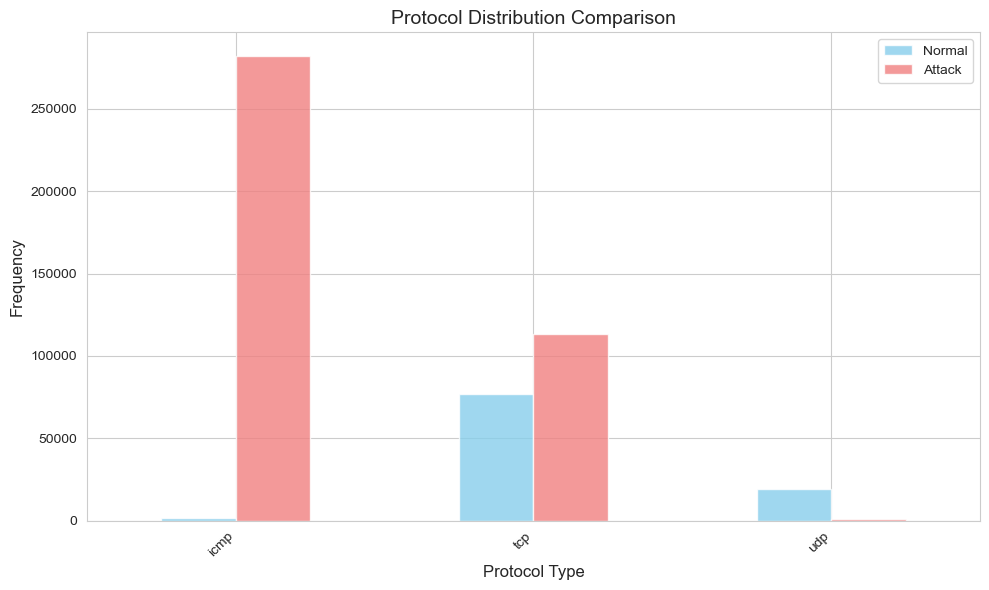

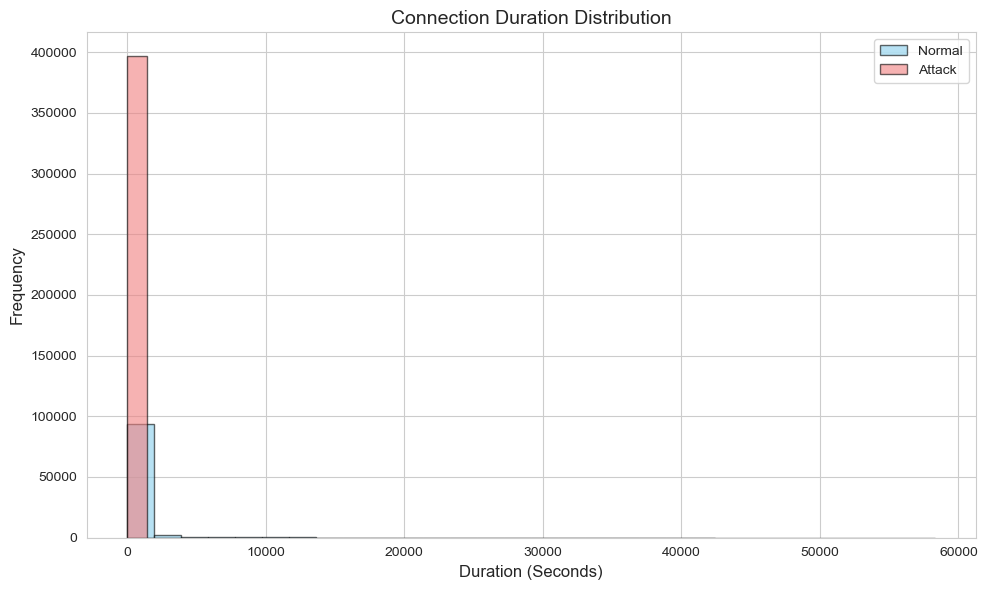

In [37]:
def plot_combined_protocol_distribution(data):
    """
    将正常连接和攻击连接的协议类型分布放入同一个柱状图进行对比
    """
    # 确保 'protocol_type' 和 'label' 列存在
    if "protocol_type" not in data.columns or "label" not in data.columns:
        print("Required columns 'protocol_type' or 'label' are missing.")
        return

    # 分别筛选正常连接和攻击连接
    protocol_normal = data[data["label"] == "normal."]["protocol_type"].value_counts()
    protocol_attack = data[data["label"] != "normal."]["protocol_type"].value_counts()

    # 合并两个数据
    combined_data = pd.DataFrame({
        "Normal": protocol_normal,
        "Attack": protocol_attack
    }).fillna(0)  # 如果某种协议只存在于一种类型中，则填充为0

    # 绘制柱状图
    ax = combined_data.plot(kind="bar", figsize=(10, 6), color=["skyblue", "lightcoral"], alpha=0.8)
    ax.set_title("Protocol Distribution Comparison", fontsize=14)
    ax.set_xlabel("Protocol Type", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.legend(["Normal", "Attack"], fontsize=10)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


def plot_duration_distribution_as_histogram(data, bins=30):
    """
    使用柱状图展示正常连接和攻击连接的持续时间分布
    """
    # 确保 'duration' 和 'label' 列存在
    if "duration" not in data.columns or "label" not in data.columns:
        print("Required columns 'duration' or 'label' are missing.")
        return

    # 分别获取正常连接和攻击连接的持续时间
    duration_normal = data[data["label"] == "normal."]["duration"]
    duration_attack = data[data["label"] != "normal."]["duration"]

    # 创建柱状图
    plt.figure(figsize=(10, 6))

    # 绘制正常连接的持续时间分布
    plt.hist(duration_normal, bins=bins, alpha=0.6, color="skyblue", label="Normal", edgecolor="black")

    # 绘制攻击连接的持续时间分布
    plt.hist(duration_attack, bins=bins, alpha=0.6, color="lightcoral", label="Attack", edgecolor="black")

    # 添加标题和坐标标签
    plt.title("Connection Duration Distribution", fontsize=14)
    plt.xlabel("Duration (Seconds)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # 添加图例
    plt.legend(fontsize=10)

    # 美化图表
    plt.tight_layout()
    plt.show()
# 调用函数进行分析
plot_combined_protocol_distribution(data)  # 绘制协议类型分布
plot_duration_distribution_as_histogram(data)  # 绘制持续时间分布

In [13]:
#str变为数值类型
categorical_columns = ["protocol_type", "service", "flag"]
label_encoders = {}
for col in categorical_columns:
    all_categories = data[col].unique()
    label_encoders[col] = LabelEncoder()
    label_encoders[col].fit(all_categories)
    data[col] = label_encoders[col].transform(data[col])
#攻击类型
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}
#标签数字化
label_data=data['label']
le = LabelEncoder()
#小类标签数字化，共23小类
labels_23_category =le.fit_transform(label_data).astype(np.int64)
data["label_digit"]= labels_23_category
#添加大类标签，共五大类
data['attack_type'] = data.label.apply(lambda r:attacks_types[r[:-1]])
target2=data["attack_type"]
#小类标签数字化
labels_5_category =le.fit_transform(target2).astype(np.int64)
data["attack_type_digit"]=labels_5_category

In [4]:
#保留这个数据，后面用于合并到处理后的数据中保存
labels=data[['label','label_digit','attack_type','attack_type_digit']]
labels

,label,label_digit,attack_type,attack_type_digit
0,normal.,11,normal,1
1,normal.,11,normal,1
2,normal.,11,normal,1
3,normal.,11,normal,1
4,normal.,11,normal,1
...,...,...,...,...
494016,normal.,11,normal,1
494017,normal.,11,normal,1
494018,normal.,11,normal,1
494019,normal.,11,normal,1


In [5]:
#删除，为了后面整体相关性分析
x= data.drop(columns=labels)

In [6]:
data['label'].value_counts() #统计标签数量

label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [7]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label_digit,attack_type,attack_type_digit
0,0,1,22,9,181,5450,0,0,0,0,...,0.11,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
1,0,1,22,9,239,486,0,0,0,0,...,0.05,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
2,0,1,22,9,235,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
3,0,1,22,9,219,1337,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
4,0,1,22,9,217,2032,0,0,0,0,...,0.02,0.00,0.00,0.00,0.0,0.0,normal.,11,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,0.01,0.05,0.00,0.01,0.0,0.0,normal.,11,normal,1
494017,0,1,22,9,282,2286,0,0,0,0,...,0.17,0.05,0.00,0.01,0.0,0.0,normal.,11,normal,1
494018,0,1,22,9,203,1200,0,0,0,0,...,0.06,0.05,0.06,0.01,0.0,0.0,normal.,11,normal,1
494019,0,1,22,9,291,1200,0,0,0,0,...,0.04,0.05,0.04,0.01,0.0,0.0,normal.,11,normal,1


In [9]:
data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label_digit,attack_type_digit
count,494021.000000,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,0.467132,23.408894,7.842446,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,14.546274,0.220796
std,707.746472,0.575606,13.538332,2.250853,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,4.161397,0.451233
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,9.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
50%,0.000000,0.000000,14.000000,9.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
75%,0.000000,1.000000,42.000000,9.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
max,58329.000000,2.000000,65.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,4.000000


In [58]:
#删除全零向量
data.drop(columns=['num_outbound_cmds','is_host_login'],inplace=True)
features_Content_features_columns.remove('num_outbound_cmds')
features_Content_features_columns.remove('is_host_login')

# 相关性分析
4种相关特征的相关性分析

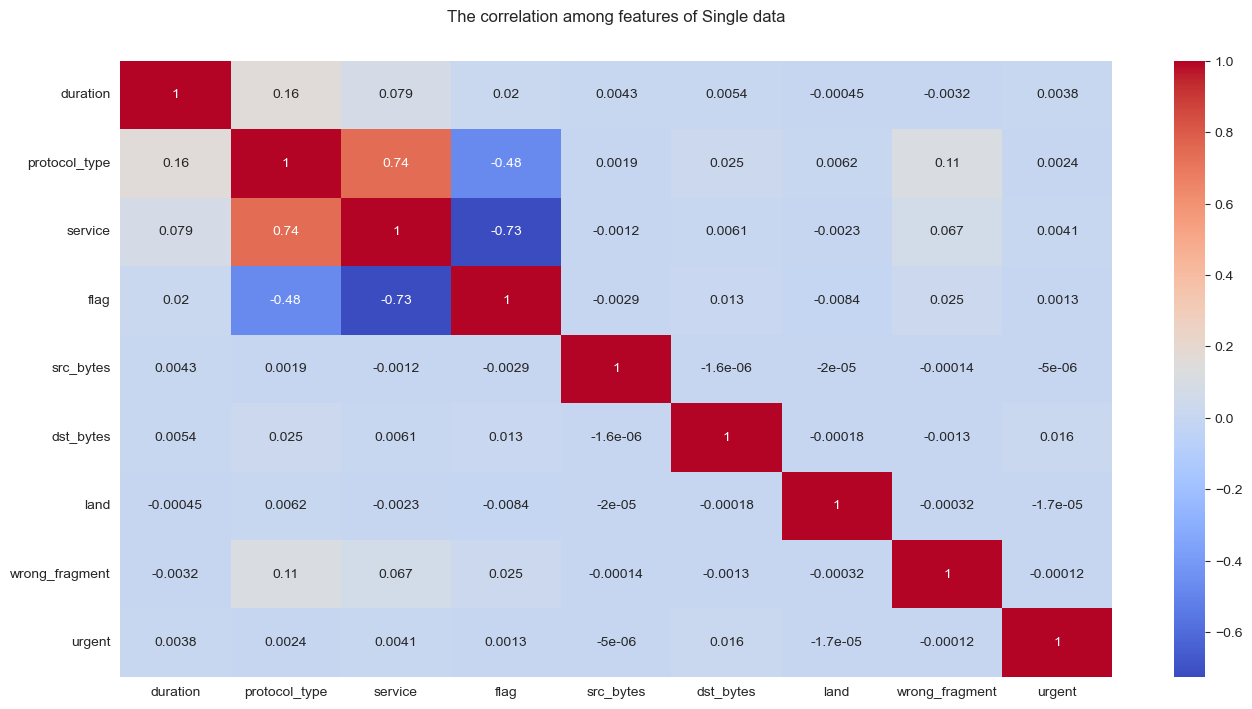

In [16]:
# 单个tcp相关性分析
correlation_matrix = single_connect_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of Single data',y= 1.05)
plt.savefig('./picture/correlation_single.png')

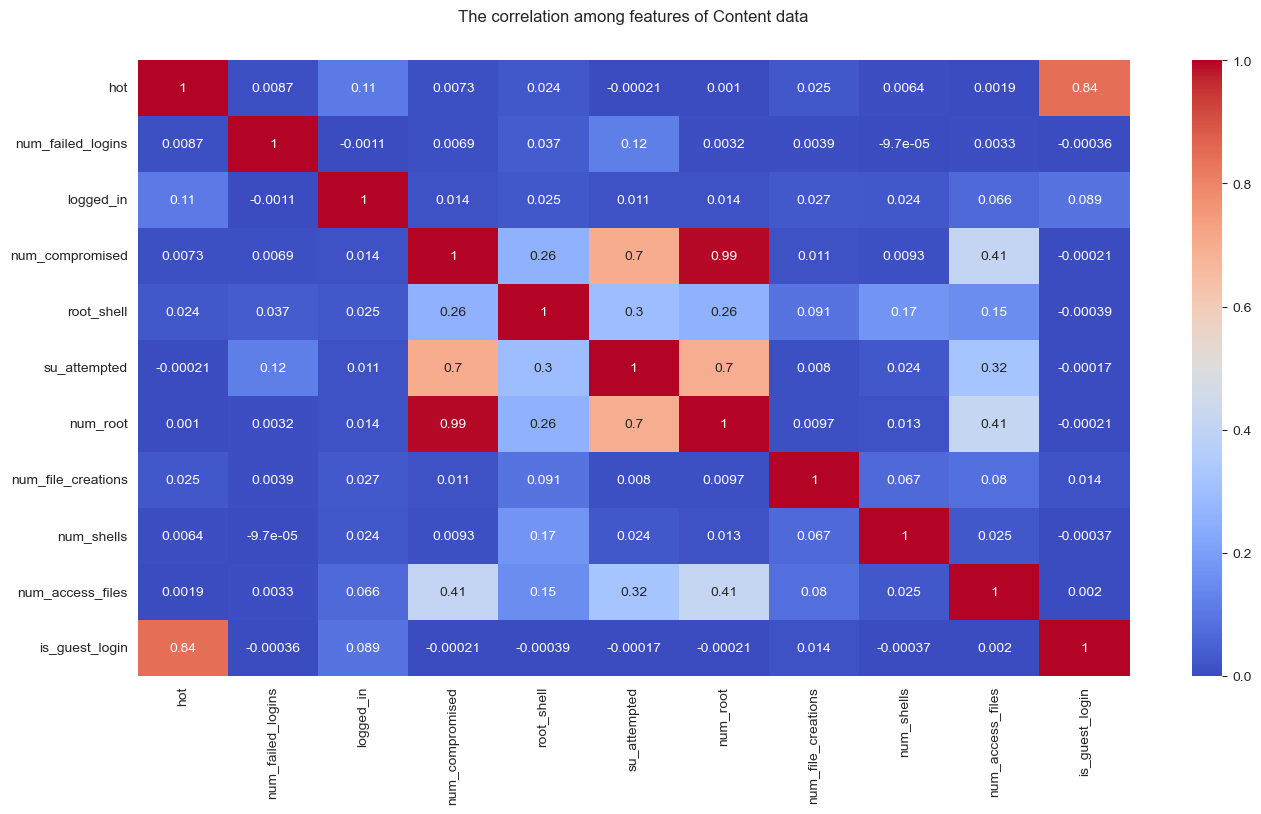

In [17]:
# 连接特征相关性分析
correlation_matrix = Content_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of Content data',y= 1.05)
plt.savefig('./picture/correlation_Content.png')

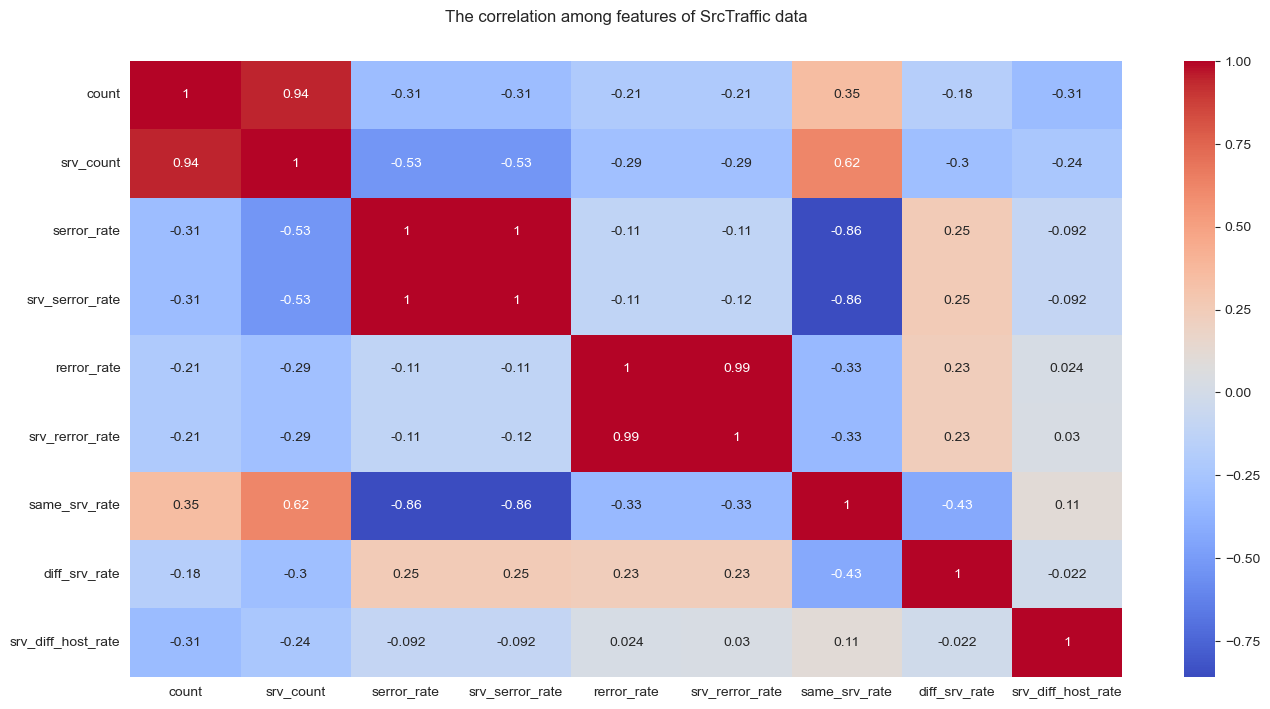

In [18]:
# 连接特征相关性分析
correlation_matrix = SrcTraffic_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of SrcTraffic data',y= 1.05)
plt.savefig('./picture/correlation_SrcTraffic.png')

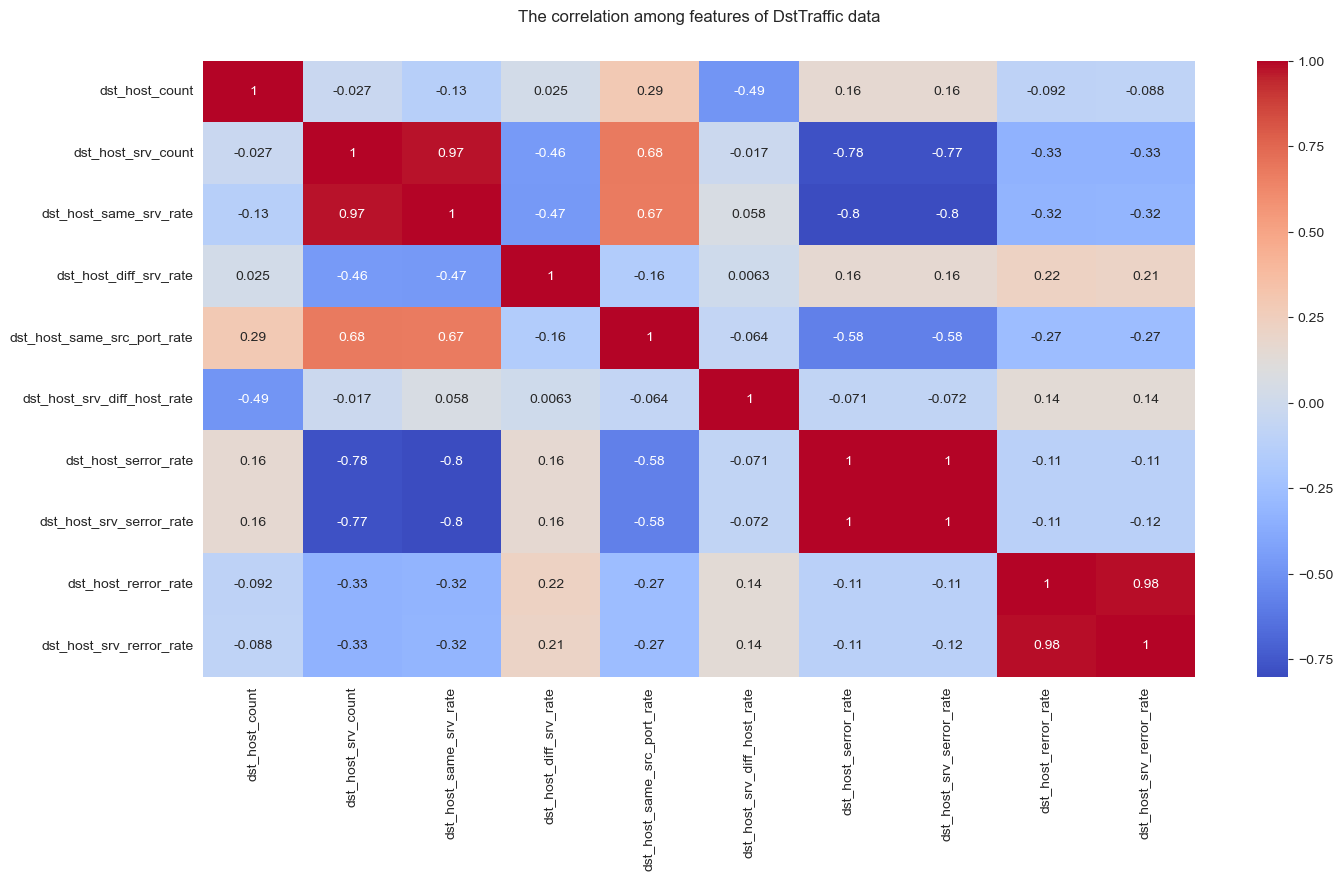

In [19]:
# 连接特征相关性分析
correlation_matrix = DstTraffic_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of DstTraffic data',y= 1.05)
plt.savefig('./picture/correlation_DstTraffic.png')

# 整体分析

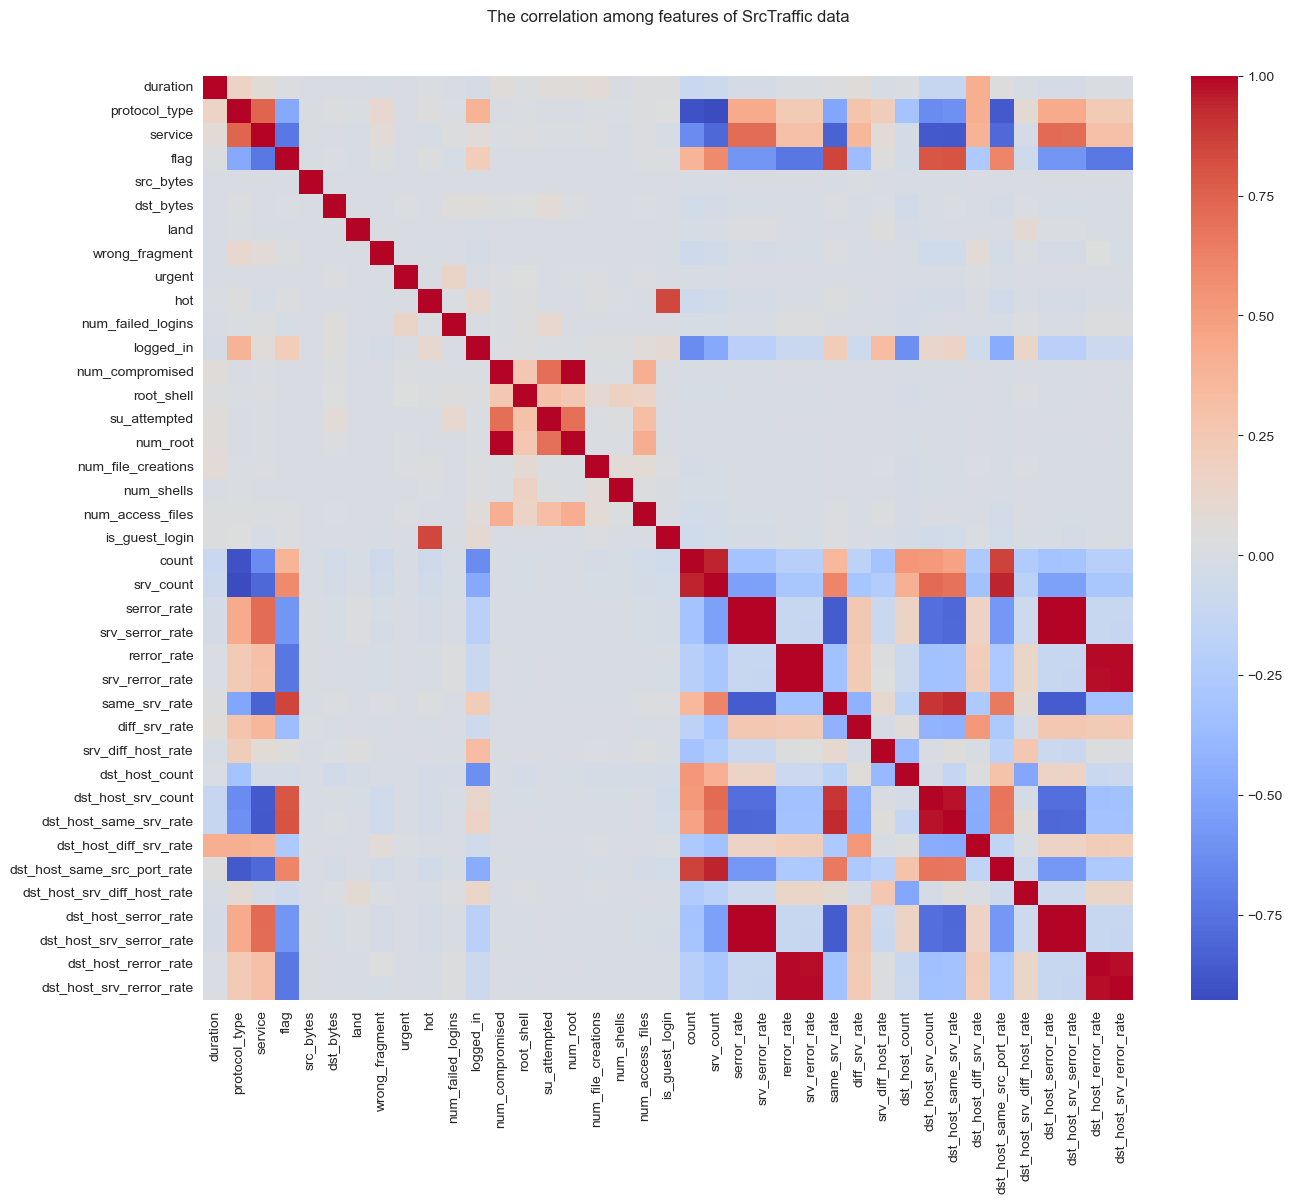

In [20]:
# 连接特征相关性分析
correlation_matrix = x.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap = "coolwarm")
plt.title('The correlation among features of SrcTraffic data',y= 1.05)
plt.savefig('./picture/correlation_Alldata.png')

In [21]:
#查看属性相关性，高相关的属性需要在后面删除一个，相当于去除冗余
x['num_root'].corr(x['num_compromised'])

0.9938277978738366

In [22]:
x['srv_serror_rate'].corr(x['serror_rate'])

0.9983615072725952

In [23]:
x['srv_count'].corr(x['count'])

0.9436670688882655

In [24]:
x['srv_rerror_rate'].corr(x['rerror_rate'])

0.9947309539817937

In [25]:
x['dst_host_same_srv_rate'].corr(x['dst_host_srv_count'])

0.9736854572953983

In [26]:
x['dst_host_srv_rerror_rate'].corr(x['dst_host_rerror_rate'])

0.9848038371110298

In [27]:
x['dst_host_srv_serror_rate'].corr(x['dst_host_serror_rate'])

0.9981559173373309

In [28]:
x['dst_host_same_srv_rate'].corr(x['same_srv_rate'])

0.9278080342691242

In [29]:
x['dst_host_srv_count'].corr(x['same_srv_rate'])

0.8989546630324209

In [30]:
x['dst_host_same_src_port_rate'].corr(x['srv_count'])

0.9449263676783333

In [31]:
x['dst_host_serror_rate'].corr(x['serror_rate'])

0.9986729680105015

In [32]:
x['dst_host_serror_rate'].corr(x['srv_serror_rate'])

0.997835300373975

In [33]:
x['dst_host_srv_serror_rate'].corr(x['serror_rate'])

0.9978492485680104

In [34]:
x['dst_host_srv_serror_rate'].corr(x['srv_serror_rate'])

0.9993041091850098

In [35]:
x['dst_host_rerror_rate'].corr(x['rerror_rate'])

0.9869947924956001

In [36]:
x['dst_host_rerror_rate'].corr(x['srv_rerror_rate'])

0.9821663427308375

In [37]:
x['dst_host_srv_rerror_rate'].corr(x['rerror_rate'])

0.9851995540751249

In [38]:
x['dst_host_srv_rerror_rate'].corr(x['srv_rerror_rate'])

0.9865705438845669

In [39]:
#删除冗余属性

x.drop('num_root',axis = 1,inplace = True)

x.drop('srv_serror_rate',axis = 1,inplace = True)

x.drop('srv_rerror_rate',axis = 1, inplace=True)

x.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

x.drop('dst_host_serror_rate',axis = 1, inplace=True)

x.drop('dst_host_rerror_rate',axis = 1, inplace=True)

x.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

x.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [40]:
df_std = x.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
protocol_type                       0.575606
hot                                 0.782103
num_compromised                     1.798326
flag      

In [41]:
x.shape

(494021, 31)

In [42]:
x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,22,9,181,5450,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,9,9,0.0,0.11,0.00
1,0,1,22,9,239,486,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,19,19,0.0,0.05,0.00
2,0,1,22,9,235,1337,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,29,29,0.0,0.03,0.00
3,0,1,22,9,219,1337,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,39,39,0.0,0.03,0.00
4,0,1,22,9,217,2032,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,49,49,0.0,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,0.00,0.0,1.0,0.0,0.40,86,255,0.0,0.01,0.05
494017,0,1,22,9,282,2286,0,0,0,0,...,0.00,0.0,1.0,0.0,0.00,6,255,0.0,0.17,0.05
494018,0,1,22,9,203,1200,0,0,0,0,...,0.17,0.0,1.0,0.0,0.17,16,255,0.0,0.06,0.05
494019,0,1,22,9,291,1200,0,0,0,0,...,0.00,0.0,1.0,0.0,0.17,26,255,0.0,0.04,0.05


In [43]:
# Target variable and train set
Y = data[['attack_type']]
feature_name = x.columns.tolist()

sc = MinMaxScaler()
X = sc.fit_transform(x)
data = pd.DataFrame(X, columns=feature_name)
data = pd.concat([data, labels], axis=1)
data.to_csv("./dataset/kdd_cup99_10_percent.csv",index=False)